In [89]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [90]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Set number of classes

In [91]:
NUM_CLASSES = 28

# Dataset reading

In [92]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [93]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [95]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [96]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 42)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                860       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 28)                308       
                                                                 
Total params: 1378 (5.38 KB)
Trainable params: 1378 (5.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [98]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [99]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/18 [>.............................] - ETA: 12s - loss: 3.3828 - accuracy: 0.0391
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 1s 16ms/step - loss: 3.3134 - accuracy: 0.0686 - val_loss: 3.2339 - val_accuracy: 0.0865
Epoch 2/1000
 1/18 [>.............................] - ETA: 0s - loss: 3.2683 - accuracy: 0.0703
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 6ms/step - loss: 3.2129 - accuracy: 0.0774 - val_loss: 3.1468 - val_accuracy: 0.0904
Epoch 3/1000
 1/18 [>.............................] - ETA: 0s - loss: 3.1411 - accuracy: 0.1250

c:\Users\markl\anaconda3\envs\opencv_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 6ms/step - loss: 3.0982 - accuracy: 0.0997 - val_loss: 3.0320 - val_accuracy: 0.1140
Epoch 4/1000
 1/18 [>.............................] - ETA: 0s - loss: 2.9761 - accuracy: 0.1953
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 6ms/step - loss: 2.9734 - accuracy: 0.1263 - val_loss: 2.8731 - val_accuracy: 0.2018
Epoch 5/1000
 1/18 [>.............................] - ETA: 0s - loss: 2.8593 - accuracy: 0.1641
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 6ms/step - loss: 2.8090 - accuracy: 0.1700 - val_loss: 2.6729 - val_accuracy: 0.1979
Epoch 6/1000
 1/18 [>.............................] - ETA: 0s - loss: 2.7193 - accuracy: 0.1641
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [=============

In [100]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 [==============================] - 0s 2ms/step - loss: 0.7379 - accuracy: 0.7641


In [101]:
# Loading the saved model

model = tf.keras.models.load_model(model_save_path)

In [102]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 69ms/step
[3.1714492e-02 1.1098411e-01 2.9341026e-08 4.3624693e-01 2.0831111e-01
 4.6933526e-08 7.7412118e-08 5.7234081e-07 3.5708480e-02 4.2816843e-08
 4.0593324e-07 3.8835267e-08 3.7778350e-06 5.1638558e-06 2.5782197e-07
 9.3826058e-09 3.2742065e-07 5.8376639e-08 1.2128780e-01 7.9011095e-08
 9.1214543e-03 3.2336982e-03 4.3380395e-02 5.4389147e-08 1.2488483e-07
 1.6929948e-07 5.9348608e-08 1.0370450e-07]
3


# Confusion matrix

24/24 [==============================] - 0s 2ms/step


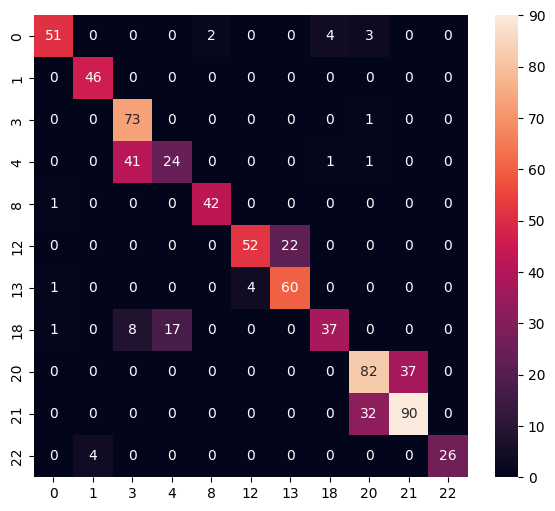

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        60
           1       0.92      1.00      0.96        46
           3       0.60      0.99      0.74        74
           4       0.59      0.36      0.44        67
           8       0.95      0.98      0.97        43
          12       0.93      0.70      0.80        74
          13       0.73      0.92      0.82        65
          18       0.88      0.59      0.70        63
          20       0.69      0.69      0.69       119
          21       0.71      0.74      0.72       122
          22       1.00      0.87      0.93        30

    accuracy                           0.76       763
   macro avg       0.81      0.79      0.79       763
weighted avg       0.78      0.76      0.76       763



In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [104]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\markl\anaconda3\envs\opencv_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [105]:
# Transform model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\markl\AppData\Local\Temp\tmpbcexwe04\assets


INFO:tensorflow:Assets written to: C:\Users\markl\AppData\Local\Temp\tmpbcexwe04\assets


7664

# Inference test

In [106]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [107]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [108]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [109]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.02 ms


In [110]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.1714506e-02 1.1098409e-01 2.9341077e-08 4.3624693e-01 2.0831120e-01
 4.6933437e-08 7.7412125e-08 5.7234024e-07 3.5708491e-02 4.2816840e-08
 4.0593284e-07 3.8835267e-08 3.7778382e-06 5.1638604e-06 2.5782171e-07
 9.3825889e-09 3.2742096e-07 5.8376635e-08 1.2128785e-01 7.9011016e-08
 9.1214608e-03 3.2336996e-03 4.3380391e-02 5.4389140e-08 1.2488469e-07
 1.6929948e-07 5.9348601e-08 1.0370451e-07]
3
